# Task: Predict if the point is blue or red

Expectation: A working solution where the learned class label using Logistic Regression is similar (for most possible points) to the training class label. Also show the decision boundary.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)



## This is a synthetic data (x, y) points

(200, 2)
(200, 1)


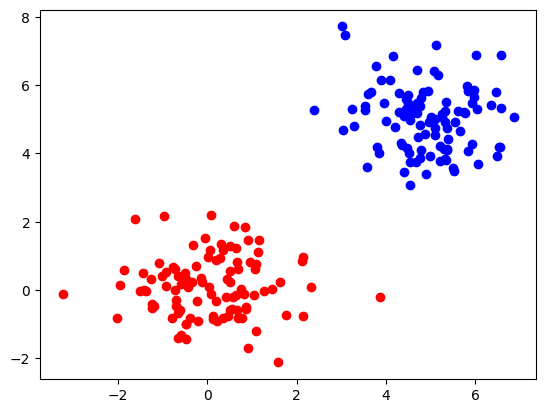

In [4]:
num_data=100 # data points per class

np.random.seed(seed=42)

x1=np.random.randn(2,num_data)+5
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
X = X.T
y = y.T

#split the data into training and test sets
train_ratio = 0.7
test_ratio = 1-train_ratio

train_size = int(train_ratio * X.shape[0])
test_size = X.shape[0] - train_size

print(X.shape)
print(y.shape)



## Add the bias term to X

(200, 4)


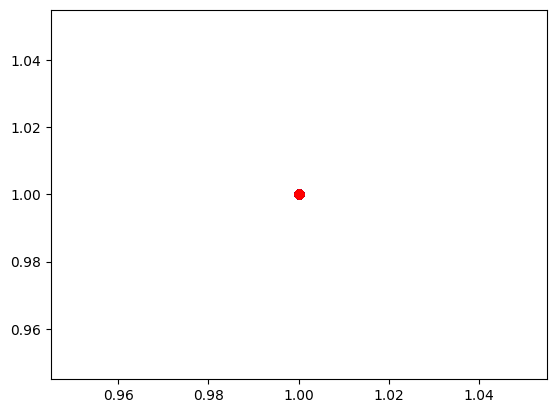

In [12]:
x_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
# another way to add bias
# x_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

print(x_with_bias.shape)
plotClass(x_with_bias.T,y.T,'o')

## Define the sigmoid function

In [13]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

## Define the cross entropy loss function

In [14]:
cross_entropy = lambda y, y_hat: -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

## Defined the loop that contains the following:
- Initialize the learning rate
- Initialize the weights randomly
- Do the forward pass which computs yhat(predictions)
- Save the losses as you train the model
- Do the backward pass which updates the weights of the model

In [38]:
lr = 1e-3
weights = np.random.randn(x_with_bias.shape[1], 1) * lr



losses = []
val_losses = []
training_losses = []
validation_losses = []


X_train, X_val, y_train, y_val = train_test_split(
    x_with_bias, y, test_size=.32, random_state=42)

z_train = np.dot(X_train, weights)
y_hat_train = sigmoid(z_train)
    
for epoch in range(100):
    y_hat = sigmoid(x_with_bias.dot(weights))
    error = cross_entropy(y, y_hat)
    losses.append(error)
    weights -= lr * x_with_bias.T.dot(y_hat - y)
    
    y_hat = sigmoid(x_with_bias.dot(weights))
    error = cross_entropy(y, y_hat)
    val_losses.append(error)
    
    loss_train = cross_entropy(y_train, y_hat_train)
    training_losses.append(loss_train)
    
    # Forward pass (validation data)
    z_val = np.dot(X_val, weights)
    y_hat_val = sigmoid(z_val)
    
    # Compute and save the validation loss
    loss_val = cross_entropy(y_val, y_hat_val)
    validation_losses.append(loss_val)
    
    # Backward pass (only using training data)
    gradient = np.dot(X_train.T, (y_hat_train - y_train)) / X_train.shape[0]
    weights -= lr * gradient

## plot the losses that you have saved

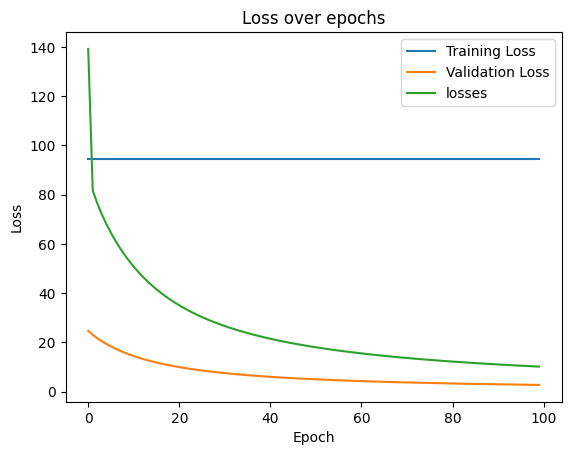

In [39]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(losses , label = 'losses')
plt.legend()
plt.show()